<h1><center>                      *Claire Boom*</center></h1>

**Abstract:**

*Introduction:*   
The multi-armed bandit problem is a great demonstration of the efficacy of various algorithms for reinforced learning. It involves giving an algorithm a set of 'slot machine' levers to pull and letting it decide which lever to pull next. The problem presents a unique challenge for an algorithm to balance between exploration versus exploitation in choosing which lever is the most advantageous choice. Some algorithms are completely exploratory - pulling levers to gather more information about their environment. Others are completely exploitative - strategically selecting the most lucrative option based on past and current estimations of each arm's output. The remaining algorithms are somewhere in between, balancing learning with exploiting in various ways.

*Setup:*  
For the purposes of this project, four different algorithms and their rates of success on a multi-armed bandit environment were analyzed. These algorithms include Random Selection, Greedy, Epsilon-Greedy, and Softmax. To compare them, a Monte-Carlo style setup was implemented to produce an optimized average accumulative award for each algorithm over a set of 100 runs. The number of pulls an algorithm takes before running out of a set amount of 'money' M was also calculated as a means of endurance analysis, assuming that each algorithm starts with the same M value and each pull produces a positive (or negative) reward.   

*Results:*  
Two main factors were tested to see how they influenced the outputs of each algorithm: the effects of manipulating the arm numbers as well as the variance between the arms' payout distributions. It was found that increasing the number of Bandit arms heightened the efficiency of the Softmax and Epsilon-Greedy algorithms, whereas the Greedy and Random Selection algorithms excelled at lower arm numbers. Variance affected outputs in the opposite way, where high variance favored the luck-influenced Greedy and Random Selection algorithms, and low variance favored the strategizing Softmax and Epsilon-Greedy algorithms. 

    
**Algorithms:**
    

   
Import the relevant packages:
   

In [15]:
import numpy as np 
import pandas as pd
import random as random
import matplotlib.pyplot as plt

   
A function to continuously update estimations after each arm pull:
   

In [24]:
def UpdateEstimations(estimations, total_pulls, total_rewards, 
                      chosen_arm, reward): 
    total_pulls[0] += 1 # total number of pulls increases by 
                        # 1 after each pull regardless of arm 
                        # choice 
    total_pulls[chosen_arm] += 1 # number of pulls for selected 
                                 # arm increases by 1 
    total_rewards[0] += reward # total reward increases (or decreases) 
                               # by selected arm's reward payout 
    total_rewards[chosen_arm] += reward # total payout for selected arm 
                               # increases (or decreases) by it's reward 
                               # payout
    estimations[0] = total_rewards[0]/total_pulls[0] #  updates the overall 
                                                     # average payout of 
                                                     # all the arms 
    average = total_rewards[chosen_arm]/total_pulls[chosen_arm] 
    estimations[chosen_arm] = average # updates the average payout of 
                                      # selected arm

   
Setting up a bandit environment to output the total reward over a set number of pulls:
   

In [25]:
def BanditSetup(probability_average_list, sd_list, num_pulls, 
                algorithm_choice, epsilon=0.1, alpha = 0.1):
    total_arms = len(probability_average_list)
        
    # array to hold current reward probability estimations where first 
    # index is average reward per pull and remaining indices are payout 
    # estimations for each arm index
    estimations = [0 for i in range(len(probability_average_list)+1)]

    # array of current reward amounts for each arm where first index is 
    # total reward thus far and remaining indices are total payouts for 
    # each arm index (used to update estimations array)
    total_rewards = [0 for i in range(len(probability_average_list)+1)]

    # array where first index is total pulls and remaining indices are 
    # total pulls for each arm (used to update estimations array)
    total_pulls = [0 for i in range(len(probability_average_list)+1)]

    # randomly pull enough arms to to initiate a workable estimations 
    # array, but not enough to bias greedy algorithm
    for i in range(total_arms//2):
        next_arm = RandomSelection()
        UpdateEstimations(estimations, total_pulls, total_rewards, next_arm, 
                          PullAnArm(next_arm, probability_average_list, 
                                    sd_list))
        
    for pull in range(num_pulls): 
        if(algorithm_choice == Greedy): # workaround clauses to ensure 
            next_arm = Greedy(estimations) # correct parameters are passed 
        if(algorithm_choice == RandomSelection): # into each algorithm 
            next_arm = RandomSelection()
        if(algorithm_choice == EpsilonGreedy):
            next_arm = EpsilonGreedy(epsilon,estimations)
        if(algorithm_choice == Softmax):
            next_arm = Softmax(estimations, arm_list, alpha)
        reward = PullAnArm(next_arm, probability_average_list, sd_list)
        UpdateEstimations(estimations, total_pulls, total_rewards, next_arm, 
                          reward) # update current estimations after 
                                  # each pull
    return(total_rewards[0]) # returns the total reward after the designated
                             # number of pulls are completed

   
Setting up an alternative Bandit environment that returns the number of pulls an algorithm takes before either doubling its money or running out of money:
   

In [21]:
def BanditEndurance(probability_average_list, sd_list, money, 
                    algorithm_choice, epsilon=0.1, alpha = 0.1):
    total_arms = len(probability_average_list)
        
    # array to hold current reward probability estimations where first 
    # index is average reward per pull and remaining indices are payout 
    # estimations for each arm index
    estimations = [0 for i in range(len(probability_average_list)+1)]

    # array of current reward amounts for each arm where first index is 
    # total reward thus far and remaining indices are total payouts for 
    # each arm index (used to update estimations array)
    total_rewards = [0 for i in range(len(probability_average_list)+1)]

    # array where first index is total pulls and remaining indices are total
    # pulls for each arm (used to update estimations array)
    total_pulls = [0 for i in range(len(probability_average_list)+1)]

    # pull enough arms to to initiate a workable estimations array, but not 
    # enough to bias greedy algorithm
    for i in range(total_arms//2):
        next_arm = RandomSelection()
        UpdateEstimations(estimations, total_pulls, total_rewards, next_arm, 
                          PullAnArm(next_arm, probability_average_list, 
                                    sd_list))
        
    earned_money = money
    threshold = 2*money # if rewards go beyond doubling money, 
                        # consider successful
    
    while earned_money > 0 and earned_money < threshold: # total reward 
        if(algorithm_choice == Greedy): # hasn't reached an end case 
            next_arm = Greedy(estimations)
        if(algorithm_choice == RandomSelection):
            next_arm = RandomSelection()
        if(algorithm_choice == EpsilonGreedy):
            next_arm = EpsilonGreedy(epsilon,estimations)
        if(algorithm_choice == Softmax):
            next_arm = Softmax(estimations, arm_list, alpha)
        reward = PullAnArm(next_arm, probability_average_list, sd_list)
        UpdateEstimations(estimations, total_pulls, total_rewards, next_arm,
                          reward) # update current estimations after 
                                  # each pull
        earned_money = earned_money + reward # increment (or decrement) 
                                            #total money after each payout
    return(total_pulls[0]) # returns the total number of pulls it takes an 
                           # algorithm to reach an end case 

   
A function to return the result of pulling a given arm index based on the pre-defined probability average list where rewards are paid out in a normal distribution:
   

In [26]:
def PullAnArm(arm_index, probability_average_list, sd_list):
    reward = np.random.normal(probability_average_list[arm_index-1], 
                              sd_list[arm_index-1])
    return(reward)

The Random Selection technique (completely exploratory) randomly selects which arm to choose next:

In [27]:
def RandomSelection():
    next_arm = np.random.randint(low = 1, 
                                 high = len(probability_average_list)+1)
    return(next_arm)

The Greedy technique (completely exploitative) always selects the arm with the highest reward thus far:

In [28]:
def Greedy(estimations):
    next_arm = estimations.index(np.max(estimations[1:]))
    return(next_arm)

The Epsilon-Greedy technique (mix of exploratory and exploitative) selects the arm with the highest average reward with probability 1 - epsilon and randomly selects another arm with probability epsilon:

In [29]:
def EpsilonGreedy(epsilon, estimations):
    randNum = np.random.random() 
    if epsilon > randNum: # explore with probability 1-epsilon 
        next_arm = RandomSelection()
    else: # exploit with probability epsilon
        next_arm = estimations.index(np.max(estimations[1:]))
    return(next_arm)

The Softmax technique (biased mix of exploration vs. exploitation) exploits the most promising arm and explores the next most promising arms based on estimated rates of return:

In [30]:
def Softmax(estimations, arm_list, alpha):
    randNum = np.random.random() 
    est_sum = 0
    softmax_probabilities = [0]*len(arm_list)
    for i in range(1,len(estimations),1):
        est_sum += np.exp(estimations[i])
    for i in range(1,len(estimations),1): # softmax probability distributions
        softmax_probabilities[i-1] = np.exp(estimations[i])/est_sum 
        
    if alpha > randNum: # biased exploration with probability 1-alpha
        next_arm = np.random.choice(arm_list, p = softmax_probabilities)
    else: # exploit with probability alpha
        next_arm = estimations.index(np.max(estimations[1:]))
    return next_arm

Now that the environments and all the algorithms are set up, Monte-Carlo simulations are created to compare and analyze the outputs of each algorithm technique on an environment.

This simulation runs the Bandit Setup environment a set number of trials and outputs the average reward per pull for each technique and graphs the results to compare:

In [32]:
def RunBanditSetup(probability_average_list, sd_list, num_pulls, runs):
    greedy_rewards = [] # array to hold simulation reward data
    random_rewards = []
    epsilon_rewards = []
    softmax_rewards = []
    greedy_wins = 0 # count of positive reward outcomes 
    greedy_losses = 0 # count of negative reward outcomes 
    random_wins = 0
    random_losses = 0
    epsilon_wins = 0
    epsilon_losses = 0
    softmax_wins = 0
    softmax_losses = 0

    for i in range(runs): # run each bandit simulation
        new_greedy = BanditSetup(probability_average_list, sd_list, 
                                 num_pulls, Greedy)
        new_random = BanditSetup(probability_average_list, sd_list, 
                                 num_pulls, RandomSelection)
        new_epsilon = BanditSetup(probability_average_list, sd_list, 
                                  num_pulls, EpsilonGreedy)
        new_softmax = BanditSetup(probability_average_list, sd_list, 
                                  num_pulls, Softmax)
        
        greedy_rewards.append(new_greedy) # add simlation results to  
        random_rewards.append(new_random) # reward data arrays 
        epsilon_rewards.append(new_epsilon)
        softmax_rewards.append(new_softmax)
        
        if new_greedy >= 0: # ended with a positive reward
            greedy_wins += 1
        if new_greedy < 0: # ended with a negative reward
            greedy_losses += 1
        if new_random >= 0:
            random_wins += 1
        if new_random < 0:
            random_losses += 1
        if new_epsilon >= 0:
            epsilon_wins += 1
        if new_epsilon < 0:
            epsilon_losses += 1
        if new_softmax >= 0:
            softmax_wins += 1
        if new_softmax < 0:
            softmax_losses += 1
            
    greedy_sd = np.std(greedy_rewards) # calculate standard deviations of  
    random_sd = np.std(random_rewards) # each data array 
    epsilon_sd = np.std(epsilon_rewards)
    softmax_sd = np.std(softmax_rewards)
    
    greedy_rewards_av = np.mean(greedy_rewards) # calculate average of each 
    random_rewards_av = np.mean(random_rewards) # data array
    epsilon_rewards_av = np.mean(epsilon_rewards)
    softmax_rewards_av = np.mean(softmax_rewards)
    
    data = np.array([[greedy_rewards_av,greedy_sd,greedy_wins,
                      greedy_losses], # matrix of data to be output
                     [random_rewards_av,random_sd,random_wins,
                      random_losses],
                     [epsilon_rewards_av,epsilon_sd,epsilon_wins,
                      epsilon_losses],
                     [softmax_rewards_av,softmax_sd,softmax_wins,
                      softmax_losses]])
    df = pd.DataFrame(data, 
                      index=['Greedy','Random','Epsilon-Greedy','Softmax'],
                      columns=['Average','Standard Deviation','Wins',
                               'Losses'])
    print(df) # print data in table form 
    
    reward_list = [greedy_rewards_av,random_rewards_av,epsilon_rewards_av,
                   softmax_rewards_av] # data to graph
    std_list = [greedy_sd,random_sd,epsilon_sd,softmax_sd] # error bar 
                                            # values for each algorithm 
    
    plt.figure(1, figsize=(12,4)) # plot horizontal bar graph of 
    plt.subplot(121) # reward distributions
    plt.xlabel('Average Reward')
    plt.ylabel('Algorithm Choice')
    plt.title('Reward Distributions')
    plt.barh([0,1,2,3],width=reward_list,
             tick_label=['Greedy','Random','Epsilon-Greedy','Softmax'],
             xerr=std_list, capsize=5) 
    plt.subplot(122)
    plt.xlabel('Wins')
    plt.ylabel('Frequencies')
    plt.title('Success Outcomes')
    plt.bar([0,1,2,3], # plot vertical bar graph of wins for each algorithm
            height=[greedy_wins,random_wins,epsilon_wins,softmax_wins], 
            tick_label=['Greedy','Random','Epsilon-Greedy','Softmax']) 
    plt.show()    

This simulation runs the Bandit Endurance environment a set number trials and outputs the total number of pulls before an algorithm either doubles its money or runs out of money and graphs the results for comparison: 

In [33]:
def BanditEnduranceRun(probability_average_list, sd_list, money, runs):
    greedy_pulls = [] # array to store pull data 
    random_pulls = []
    epsilon_pulls = []
    softmax_pulls = []

    for i in range(runs): # gather data from each run
        greedy_pulls.append(BanditEndurance(probability_average_list, 
                                            sd_list, money, Greedy)) 
        random_pulls.append(BanditEndurance(probability_average_list, 
                                            sd_list, money, RandomSelection))
        epsilon_pulls.append(BanditEndurance(probability_average_list, 
                                             sd_list, money, EpsilonGreedy))
        softmax_pulls.append(BanditEndurance(probability_average_list, 
                                             sd_list, money, Softmax))
            
    greedy_sd = np.std(greedy_pulls) # calculate standard deviation for each 
    random_sd = np.std(random_pulls) # data array
    epsilon_sd = np.std(epsilon_pulls)
    softmax_sd = np.std(softmax_pulls)
    
    greedy_pulls_av = np.mean(greedy_pulls) # calculate average for each 
    random_pulls_av = np.mean(random_pulls) # data array
    epsilon_pulls_av = np.mean(epsilon_pulls)
    softmax_pulls_av = np.mean(softmax_pulls) 
    
    pull_list = [greedy_pulls_av,random_pulls_av,epsilon_pulls_av,
                 softmax_pulls_av] # data to graph
    std_list = [greedy_sd,random_sd,epsilon_sd,softmax_sd] # error bar 
                                            #values for each algorithm 
    
    data = np.array([[greedy_pulls_av,greedy_sd], # matrix of data to be  
                    [random_pulls_av,random_sd],  # output
                    [epsilon_pulls_av,epsilon_sd],
                    [softmax_pulls_av,softmax_sd]])
    df = pd.DataFrame(data, 
                      index=['Greedy','Random','Epsilon-Greedy','Softmax'], 
                      columns=['Average','Standard Deviation'])
    
    print(df) # print data in table form 
    
    plt.xlabel('Average Number of Pulls') # plot data in a horizontal bar  
    plt.ylabel('Algorithm Choice') # graph
    plt.title('Pull Distributions')
    plt.barh([0,1,2,3],width=pull_list,
             tick_label=['Greedy','Random','Epsilon-Greedy','Softmax'],
             xerr=std_list, capsize=5) 
    plt.show()

**Testing the Effect of Arm Number on Efficiency:**

The first item of investigation is to evaluate whether varying the number of arms affects the efficacy of each algorithm. A range of arms from 2 to 10 will be tested in sequence to analyze whether arm number affects the outputs. In order to help isolate arm number as the only relevant variable, the variance and standard deviations of the probability distributions across the arms are kept relatively low across these tests so as not to become confounding variables.

**2 arms:**

                   Average  Standard Deviation   Wins  Losses
Greedy          184.144503           62.936486   94.0     6.0
Random           74.885611           17.294809  100.0     0.0
Epsilon-Greedy  181.333132           41.769889   98.0     2.0
Softmax         192.408334           44.568742   98.0     2.0


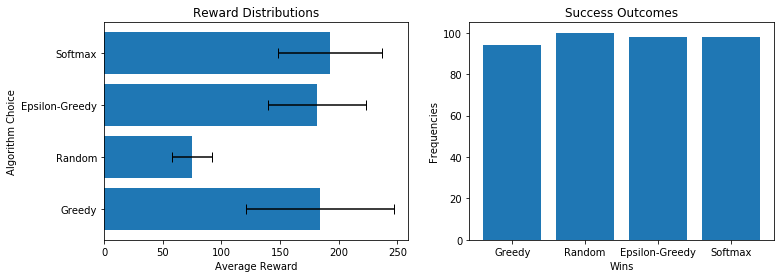

In [34]:
probability_average_list = [-0.5, 2] # initiating payout averages for arms
sd_list = [0.5, 2] # defining standard deviations for each arm's payout range
arm_list = [1, 2] # list of arm indices
RunBanditSetup(probability_average_list, sd_list, 100, 100) 
# runs Monte-Carlo Bandit Setup simulation

                Average  Standard Deviation
Greedy            63.50           37.636551
Random           132.65           28.376178
Epsilon-Greedy    59.87           21.617888
Softmax           54.83           11.273025


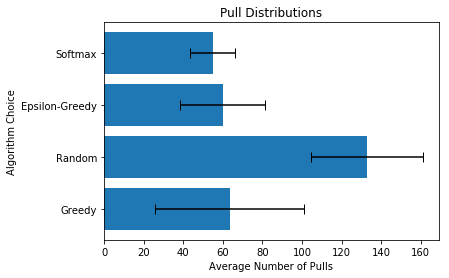

In [36]:
BanditEnduranceRun(probability_average_list, sd_list, 100, 100) 
# runs Monte-Carlo Bandit Endurance simulation

Softmax has the highest average reward as well as the least average number of pulls to double its money, but not by much when compare to Epsilon-Greedy. Greedy has a large standard deviation (likely due to chance at such small numbers), so it may surpass Softmax and Epsilon-Greedy's efficiency in some runs. It is notable that the Random Selection function wins (ends with a positive overall reward value) 100% of the time, whereas Greedy, Epsilon-Greedy, and Softmax each had at least two scenarios where they ended in the negatives. This is likely due to chance as well, which can be attributed to these functions' noticably broader standard deviation ranges in reward outputs.

**4 arms:**

                   Average  Standard Deviation   Wins  Losses
Greedy          126.752967           87.035497  100.0     0.0
Random           17.829535           17.075195   82.0    18.0
Epsilon-Greedy  150.085840           50.238396  100.0     0.0
Softmax         155.909591           61.762463  100.0     0.0


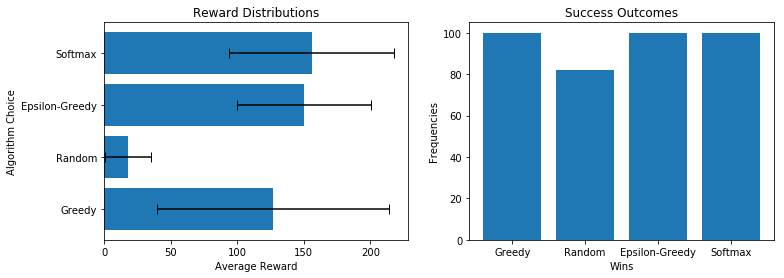

In [480]:
probability_average_list = [-0.5, 2, -1, 0.25]
sd_list = [0.5, 2, 1, 0.25]
arm_list = [1, 2, 3, 4]
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy           212.93          179.174175
Random           531.94          218.922718
Epsilon-Greedy    81.60           46.538156
Softmax           79.23           61.073047


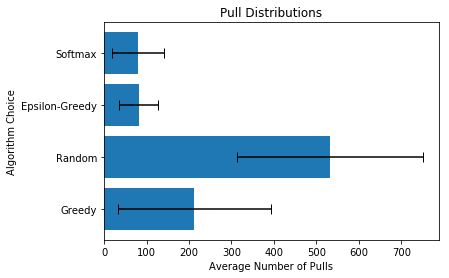

In [485]:
BanditEnduranceRun(probability_average_list, sd_list, 100, 100)

At four arms, it appears that the effects of chance are much less than that of two arms. The superiority of the Softmax and the Epsilon-Greedy functions is more clear in this scenario as well, though they are still comparable in performance. Now only Random Selection produces any losses. Greedy's standard deviation is still very high, though its performance improved in both tests.

**6 arms:**

                   Average  Standard Deviation   Wins  Losses
Greedy          136.459435           75.602614  100.0     0.0
Random          -21.963463           22.701969   14.0    86.0
Epsilon-Greedy  133.137336           50.954470  100.0     0.0
Softmax         150.054038           53.190331  100.0     0.0


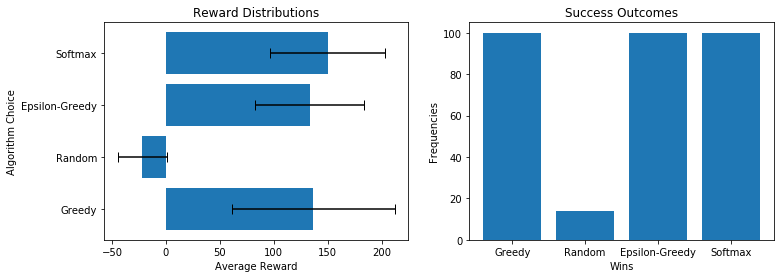

In [486]:
probability_average_list = [-0.5, 2, -1, 0.25, 1, -3]
sd_list = [0.5, 2, 1, 0.25, 1, 3]
arm_list = [1, 2, 3, 4, 5, 6]
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy           188.06          161.264864
Random           483.95          246.954869
Epsilon-Greedy    87.12           41.955996
Softmax           79.15           31.036551


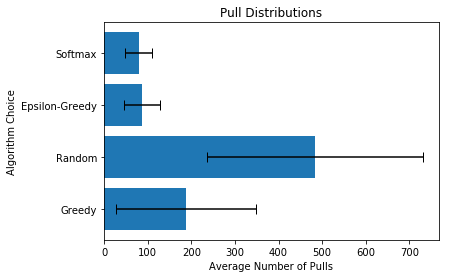

In [487]:
BanditEnduranceRun(probability_average_list, sd_list, 100, 100)

The Random Selection algorithm is becoming less and less successful at the number of arms increases. Given this scenario's spread of probabilities, it even produced a negative average reward (yikes!). The other three functions continue to improve.

**8 arms:**

                   Average  Standard Deviation   Wins  Losses
Greedy          140.613393           62.375940  100.0     0.0
Random          -17.252724           20.470100   24.0    76.0
Epsilon-Greedy  137.119767           48.565182  100.0     0.0
Softmax         153.264077           48.087159  100.0     0.0


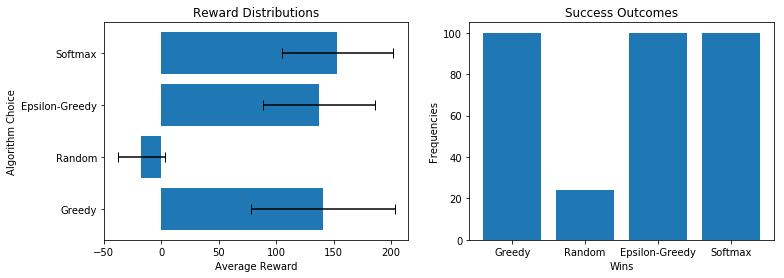

In [491]:
probability_average_list = [-0.5, 2, -1, 0.25, 1, -3, 1.5, -1.5]
sd_list = [0.5, 2, 1, 0.25, 1, 3, 1.5, 1.5]
arm_list = [1, 2, 3, 4, 5, 6, 7, 8]
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy           130.14          127.658609
Random           732.05          435.808751
Epsilon-Greedy    91.01           36.788176
Softmax           76.49           27.823549


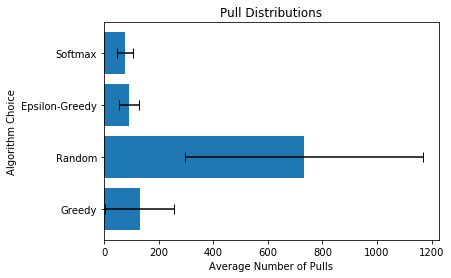

In [492]:
BanditEnduranceRun(probability_average_list, sd_list, 100, 100)

The most notable difference between the 8 arm run and the previous runs is that the standard deviations of all the algorithm outputs except Random Selection decreased comparatively. Random Selection still has poor performance, though the other three algorithms all improve.

**10 arms:**

                   Average  Standard Deviation   Wins  Losses
Greedy          194.778079           92.487861  100.0     0.0
Random           -2.907504           26.291618   45.0    55.0
Epsilon-Greedy  196.291654           66.961335  100.0     0.0
Softmax         205.550007           78.213065  100.0     0.0


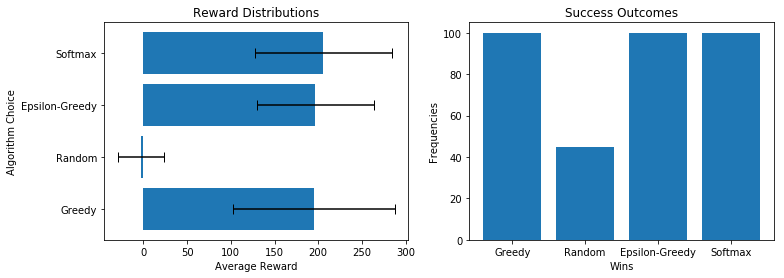

In [493]:
probability_average_list = [-0.5, 2, -1, 0.25, 1, -3, 1.5, -1.5, -2, 3]
sd_list = [0.5, 2, 1, 0.25, 1, 3, 1.5, 1.5, 2, 3]
arm_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy           106.42          119.648333
Random          1567.13         1226.127707
Epsilon-Greedy    62.14           23.908584
Softmax           64.10           23.886188


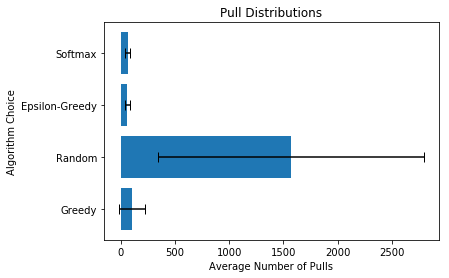

In [494]:
BanditEnduranceRun(probability_average_list, sd_list, 100, 100)

At 10 arms, the superior efficiency of Softmax is seen. It seems to continue improving as the arm numbers increase, while the other algorithms remain around the same or improve only slightly. The standard deviations of all but the Random Selection function have reduced dramatically, as chance is a much less significant factor at this number of arms.

*Analysis:*    
Quite a few conclusions can be inferred from the data collected above. First, the number of arms clearly does have an impact on the efficacy of each algorithm. This is seen in the varying distributions of average pull numbers as well as average rewards as the number of arms increases. It is interesting that at low arm numbers, the Greedy algorithm is almost comparable to the Epsilon-Greedy and Softmax results. As mentioned above, this is likely due to chance, as  it would be easy for the algorithm to identify the most lucrative arm out of a small number of arms one after only a few runs. As the number of arms increases, the Greedy algorithm's efficiency drops off, and the Epsilon-Greedy and Softmax performances keep improving. Interesting too is that the Softmax algorithm continues to improve at a rate greater than the Epsilon-Greedy function, and it is noticeably superior in terms of results especially toward the upper end of the arm numbers. The performance of the Random Selection algorithm is steadily terrible, which is to be expected because there is no 'learning' involved. The other three algorithms max out on their rates of success early on (100%), but the Random Selection algorithm has a less than perfect record on all but the 2 arm scenario. Finally, another observation is that the standard deviations of the results for each algorithm vary greatly. Those that are more susceptible to variation due to luck (i.e. the Random Selection and Greedy algorithms) have noticeably larger standard deviations, whereas those that are more strategic in their 'learning' (i.e. Epsilon-Greedy and Softmax) have smaller deviations. These algorithms also reduce their deviations each arm increase, whereas the others are less effected. 

**Testing the Effect of Variance on Efficiency:**

To test the effects of the variance of the probability averages for the arms on the outputs of each algorithm, an environment of 5 arms will be used. This is a reasonable number for a spread of averages, and it is the halfway point of the arm numbers that were tested. The variance will be adjusted by updating the standard deviation list as well as updating the spread of the averages. Four scenarios can shed light on algorithm performance: mixtures of high/low average variance with high/low standard deviation variance. 

**Low Average Variance with Low Standard Deviation Variance:**

Variance of Probability Average List:  0.015464
Variance of Standard Deviation List:  0.000584

                  Average  Standard Deviation   Wins  Losses
Greedy           9.895090            5.479390  100.0     0.0
Random          -1.373257            1.326766   13.0    87.0
Epsilon-Greedy  11.248773            3.278282  100.0     0.0
Softmax         11.188624            3.370715  100.0     0.0


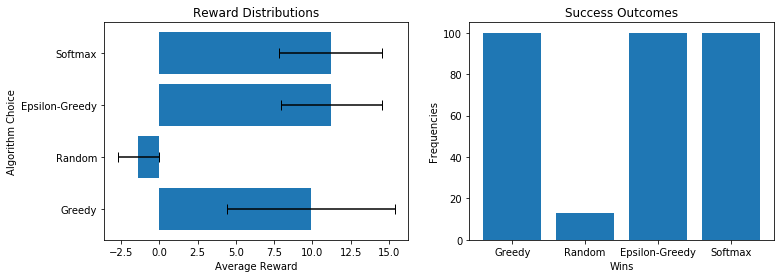

In [37]:
probability_average_list = [-0.12,0.15,0.02,-0.19,0.07]
sd_list = [0.04,0.09,0.02,0.07,0.05]
arm_list = [1, 2, 3, 4, 5]
print("Variance of Probability Average List: ", 
      np.var(probability_average_list))
print("Variance of Standard Deviation List: ", np.var(sd_list))
print("")
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy          1785.23         1692.624624
Random          7040.85          786.740292
Epsilon-Greedy   774.38           44.166000
Softmax          768.25           52.648718


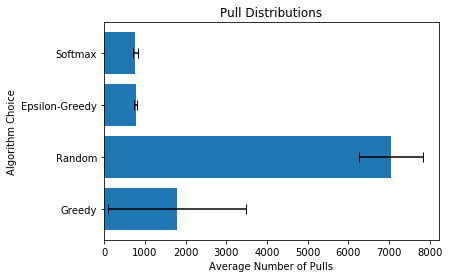

In [496]:
BanditEnduranceRun(probability_average_list, sd_list, 100, 100)

It is surprising that the standard deviations of the average reward are fairly large, while they are much smaller (particularly for Softmax and Epsilon-Greedy) for the average number of pulls. It would be expected that both would be small since the initalized probability average standard deviations were very small.

**High Average Variance with Low Standard Deviation Variance:**

Variance of Probability Average List:  28315.76
Variance of Standard Deviation List:  15.44

                     Average  Standard Deviation   Wins  Losses
Greedy          17979.289605        10980.062104  100.0     0.0
Random           2710.039358         1851.141859   94.0     6.0
Epsilon-Greedy  22958.723427         7058.874117  100.0     0.0
Softmax         18404.722147        11094.662277  100.0     0.0


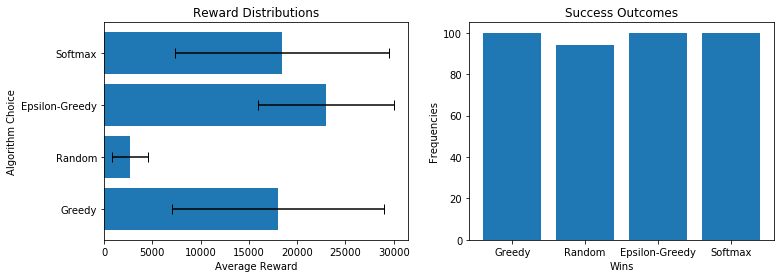

In [497]:
probability_average_list = [-70,99,323,-134,-89]
sd_list = [8,3,11,15,10]
print("Variance of Probability Average List: ", 
      np.var(probability_average_list))
print("Variance of Standard Deviation List: ", np.var(sd_list))
print("")
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy           739.95          342.064040
Random          3938.67          382.120585
Epsilon-Greedy   359.81           27.132893
Softmax          718.69          345.897462


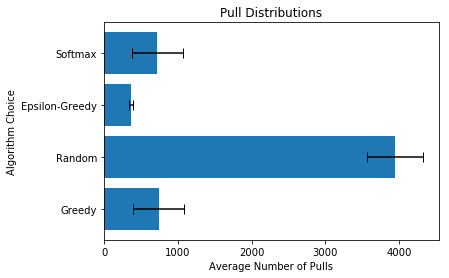

In [498]:
BanditEnduranceRun(probability_average_list, sd_list, 100000, 100) 
# increased money to accomodate for greater reward values

It is unclear why Epsilon-Greedy surpasses Softmax in this scenario, as they both choose exploratory pulls at the same rate (about every 10 runs). Theoretically, this should cause Softmax to perform better, as it chooses the second-most lucrative arm 10% of time, wherease Epsilon-Greedy randomly selects an arm 10% of the time. Perhaps since there is such high variance in the probability average list, this throws off Softmax' estimation of the most lucrative arm, and thus choosing to learn randomly is sometimes more informative than the semi-greedy learning approach of Softmax's second-best arm. 

**Low Average Variance with High Standard Deviation Variance:**

Variance of Probability Average List:  17.84
Variance of Standard Deviation List:  1833.84

                   Average  Standard Deviation  Wins  Losses
Greedy          188.474535         1580.338410  50.0    50.0
Random          291.004337         1449.865144  58.0    42.0
Epsilon-Greedy  128.350123         1639.465635  47.0    53.0
Softmax         178.855930         1632.069148  47.0    53.0


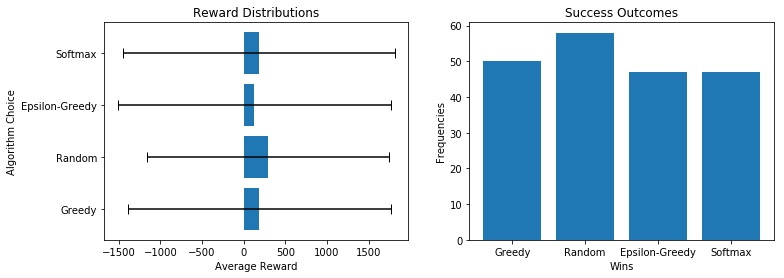

In [499]:
probability_average_list = [-3,6,-1,-2,7]
sd_list = [83,150,111,149,210]
print("Variance of Probability Average List: ", 
      np.var(probability_average_list))
print("Variance of Standard Deviation List: ", np.var(sd_list))
print("")
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy          3219.82         3342.887232
Random          3867.61         3132.231415
Epsilon-Greedy  2805.59         2353.432617
Softmax         3728.00         3791.219395


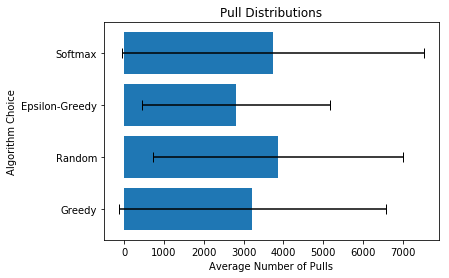

In [500]:
BanditEnduranceRun(probability_average_list, sd_list, 10000, 100)

Not surprisingly, the standard deviations of each algorithm are very large in this scenario. Because the probability averages are so small, the number of pulls it takes to achieve the threshold is high. The Random Selection algorithm performs very well, likely due to chance that the arm returns a reward on the more positive end of the scale. The success outcomes are also a bit skewed from other trials, again likely dude to the high variation in result outputs for each pull and the random luck involved.

**High Average Variance with High Standard Deviation Variance:**

Variance of Probability Average List:  58817.84
Variance of Standard Deviation List:  1833.84

                     Average  Standard Deviation  Wins  Losses
Greedy           8800.393576         2474.822382  99.0     1.0
Random         -11905.120128         3126.692668   0.0   100.0
Epsilon-Greedy   6903.404998         2682.422678  98.0     2.0
Softmax          8039.041114         4142.567244  95.0     5.0


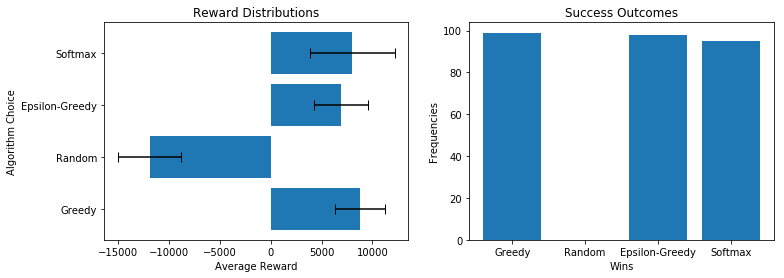

In [501]:
probability_average_list = [-70,99,-567,-134,89]
sd_list = [83,150,111,149,210]
print("Variance of Probability Average List: ", 
      np.var(probability_average_list))
print("Variance of Standard Deviation List: ", np.var(sd_list))
print("")
RunBanditSetup(probability_average_list, sd_list, 100, 100)

                Average  Standard Deviation
Greedy           115.03           27.130962
Random            93.83           23.431626
Epsilon-Greedy   139.50           28.769254
Softmax          109.06           20.634350


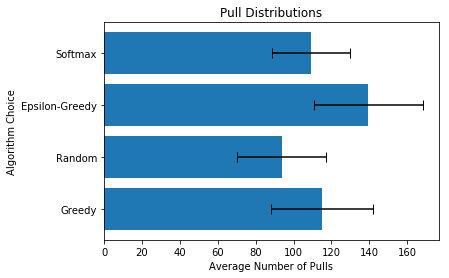

In [502]:
BanditEnduranceRun(probability_average_list, sd_list, 10000, 100)

Greedy performs comparatively well in this scenario (especially in terms of average reward output). This is likely because the arm estimations don't mean much in this scenario, as the large deviations make it hard to predict the outcome of the next pull based on previous pulls. This is a disadvantage especially for the Softmax algorithm, but Epsilon-Greedy isn't as affected by it because it explores its environment randomly instead of strategically based on past results.

*Analysis:*    
Examining the effects of manipulating the variance of the probability averages and the standard deviations shed light on the strengths and weaknesses of each algorithm based on how they performed in each scenario. Random Selection performs surprisingly well under high-variance conditions, which can be attributed to chance that it gets lucky and is given mostly positive payouts. Greedy performs best under high-variance conditions as well, where sticking to the best option early on can be more lucrative than exploring based on unreliable data. In contrast, Epsilon-Greedy and particularly Softmax perform well in all conditions except when there is a high variance in standard deviation, as they struggle to predict the most advantageous next pull based on a range of possible returns. These tests show that when using reinforced learning, it is important to consider the conditions of the environment to select the best learning algorithm for maximum output.

**Miscellaneous Supplemental Test:**

Out of curiosity, another test was performed to see if there's anything more to learn about the algorithms in this environment. Here's a test with a negative mean and high variance to see if that has any affect on outcomes:

Variance of Probability Average List:  342.0
Variance of Standard Deviation List:  2249.84

                    Average  Standard Deviation  Wins  Losses
Greedy         -1271.099441         2047.013164  23.0    77.0
Random         -1479.873415         1727.944863  20.0    80.0
Epsilon-Greedy -1317.267338         2137.401562  29.0    71.0
Softmax         -932.826236         2383.348003  33.0    67.0


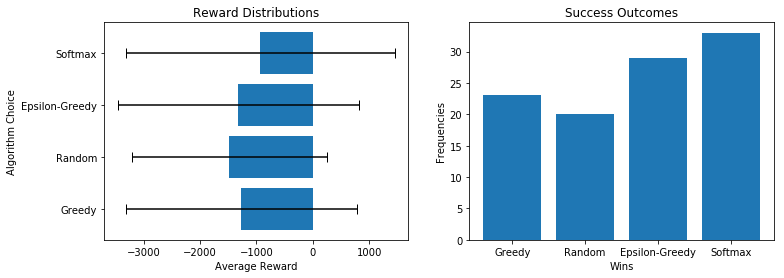

In [504]:
probability_average_list = [-50,-19,-7,4,-8]
sd_list = [83,150,211,149,210]
print("Variance of Probability Average List: ", 
      np.var(probability_average_list))
print("Variance of Standard Deviation List: ", np.var(sd_list))
print("")
RunBanditSetup(probability_average_list, sd_list, 100, 100)

This produces interesting results, as each algorithm outputs a negative average reward, and the spread of wins and losses across the algorithms is the most varied out of any other scenario. From the wide range of standard deviations, it can be inferred that a portion of the runs for all but the Random Selection algorithm output positive overall rewards. This must not happen frequently, as not even half the time do any of the algorithms end with positive.

**Discussion:**

*Outcomes:*   
Through the various tests performed on each algorithm, it is clear that in most scenarios Softmax is the most efficient at choosing higher rewards more frequently. Epsilon-Greedy is next in terms of efficiency, followed by the Greedy and finally the Random algorithm.   

*Limitations/Scope:*   
Although the tests were set up in a way to minimize confounding variables, there are practical limitations on how effective these measures were at minimizing their effects. For example, there was unavoidable slight variation in the probability average lists and standard deviations in the section testing various arm numbers. There is no good way to fully eliminate these variations since the Bandit setup requires variation in probability averages to learn, and further minimizing the effects of variation would be unnecessary. It can be assumed that these factors would be negligible within the scope of this project and what it tested. In addition, computer processing power was also a limitation for this project, as it only allowed about 100 runs in each Monte-Carlo simulation before the stack was overwhelmed. This was sufficient to provide an average and standard deviation of each algorithm's result, but often took a long time to run more processing-intensive tests like the pull number endurance environments.   

*Summary/Future Directions:*   
Overall, this project investigated an area of mulit-armed bandit research that has not yet been thoroughly examined. It provided insight into the importance of consistently setting the parameters of the environment when running multi-armed bandits. Further research could be done to examine these four algorithms on higher numbers of arms, or with greater variance alterations. Other algorithm techniques could also be added, and if a computer with higher processing power were used, it might provide more precise estimations of outputs by running more trials in the Monte-Carlo simulations. It is an exciting time to use computing power to analyze the nature of problems such as multi-armed bandits, and this project is just a stepping stone for future discoveries in this field.

**Works Cited:**

> Auer, P., Cesa-Bianchi, N., Fischer, P. (2002). *Finite-time Analysis of   
     Multiarmed Bandit Problem.* Machine Learning, Vol. 47. pp 235-256. 

> Kuleshov, V., Precup, D. (2000). *Algorithms for the Multi-Armed Bandit   
     Problem.* Journal of Machine Learning Research Vol. 1 pp 1-48. 

> Lattimore, T. & Szepesvári, C. (2019). *Bandit Algorithms.*    
     Retrieved from https://banditalgs.com/

> Li, M. (2016). *Multi-Armed Bandits.*    
     Retrieved from https://blog.thedataincubator.com/2016/07/multi-armed-bandits-2/